In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
df = pd.read_csv('./다음부터는_차라리_주식데이터.csv', index_col=0)
df

,상품명,주종,도수,용량,원재료,가격수정,ml당_가격,맛,바디감,향,목넘김,신맛,청량감,단맛,균형감
0,1000억 막걸리 프리바이오,탁주,5.0,750,쌀,3500,4.67,NaN,3.0,NaN,NaN,4.0,3.0,3.0,NaN
1,1000억 유산균막걸리,탁주,5.0,750,쌀,3200,4.27,NaN,3.0,NaN,NaN,5.0,5.0,3.0,NaN
2,1932 새싹땅콩 햅쌀막걸리,살균탁주,6.0,900,쌀,15000,16.67,NaN,NaN,NaN,NaN,2.0,3.0,2.0,NaN
3,1932 새싹땅콩 흑미막걸리,살균탁주,6.0,900,쌀,15000,16.67,NaN,NaN,NaN,NaN,1.0,1.0,3.0,NaN
4,33JU,일반증류주,18.0,500,"산양산삼,주정,결정과당,효소처리스테비아,에리스리톨,호박산,꿀",49000,98.00,3.0,1.0,4.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,회곡 생 동동주,탁주,7.0,1200,"쌀,입국,누룩,아스파탐,효모,정제수,아세설팜칼륨",1300,1.08,NaN,NaN,NaN,NaN,2.0,3.0,3.0,NaN
521,회곡 생 막걸리,탁주,6.0,750,"쌀,입국,누룩,아스파탐,효모,정제수,아세설팜칼륨",1300,1.73,NaN,NaN,NaN,NaN,2.0,2.0,2.0,NaN
522,흑돈주,기타주류,16.0,365,황칠나무,12000,32.88,NaN,2.0,2.0,3.0,NaN,NaN,NaN,NaN
523,희양산막걸리 15%,탁주,15.0,500,쌀,9500,19.00,NaN,5.0,NaN,NaN,4.0,1.0,3.0,NaN


In [583]:
df.rename(columns={'가격수정':'가격'}, inplace=True)

In [584]:
df['가격'] = df['가격'].apply(lambda x: str(x)+'원')
df['용량'] = df['용량'].apply(lambda x: str(x)+' ml')

In [585]:
df = df[['상품명','주종','도수','용량','가격','원재료','ml당_가격','맛','바디감','향','목넘김','신맛','청량감',
              '단맛','균형감']]
df

,상품명,주종,도수,용량,가격,원재료,ml당_가격,맛,바디감,향,목넘김,신맛,청량감,단맛,균형감
0,1000억 막걸리 프리바이오,탁주,5.0,750 ml,3500원,쌀,4.67,NaN,3.0,NaN,NaN,4.0,3.0,3.0,NaN
1,1000억 유산균막걸리,탁주,5.0,750 ml,3200원,쌀,4.27,NaN,3.0,NaN,NaN,5.0,5.0,3.0,NaN
2,1932 새싹땅콩 햅쌀막걸리,살균탁주,6.0,900 ml,15000원,쌀,16.67,NaN,NaN,NaN,NaN,2.0,3.0,2.0,NaN
3,1932 새싹땅콩 흑미막걸리,살균탁주,6.0,900 ml,15000원,쌀,16.67,NaN,NaN,NaN,NaN,1.0,1.0,3.0,NaN
4,33JU,일반증류주,18.0,500 ml,49000원,"산양산삼,주정,결정과당,효소처리스테비아,에리스리톨,호박산,꿀",98.00,3.0,1.0,4.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,회곡 생 동동주,탁주,7.0,1200 ml,1300원,"쌀,입국,누룩,아스파탐,효모,정제수,아세설팜칼륨",1.08,NaN,NaN,NaN,NaN,2.0,3.0,3.0,NaN
521,회곡 생 막걸리,탁주,6.0,750 ml,1300원,"쌀,입국,누룩,아스파탐,효모,정제수,아세설팜칼륨",1.73,NaN,NaN,NaN,NaN,2.0,2.0,2.0,NaN
522,흑돈주,기타주류,16.0,365 ml,12000원,황칠나무,32.88,NaN,2.0,2.0,3.0,NaN,NaN,NaN,NaN
523,희양산막걸리 15%,탁주,15.0,500 ml,9500원,쌀,19.00,NaN,5.0,NaN,NaN,4.0,1.0,3.0,NaN


In [586]:
df

,상품명,주종,도수,용량,가격,원재료,ml당_가격,맛,바디감,향,목넘김,신맛,청량감,단맛,균형감
0,1000억 막걸리 프리바이오,탁주,5.0,750 ml,3500원,쌀,4.67,NaN,3.0,NaN,NaN,4.0,3.0,3.0,NaN
1,1000억 유산균막걸리,탁주,5.0,750 ml,3200원,쌀,4.27,NaN,3.0,NaN,NaN,5.0,5.0,3.0,NaN
2,1932 새싹땅콩 햅쌀막걸리,살균탁주,6.0,900 ml,15000원,쌀,16.67,NaN,NaN,NaN,NaN,2.0,3.0,2.0,NaN
3,1932 새싹땅콩 흑미막걸리,살균탁주,6.0,900 ml,15000원,쌀,16.67,NaN,NaN,NaN,NaN,1.0,1.0,3.0,NaN
4,33JU,일반증류주,18.0,500 ml,49000원,"산양산삼,주정,결정과당,효소처리스테비아,에리스리톨,호박산,꿀",98.00,3.0,1.0,4.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,회곡 생 동동주,탁주,7.0,1200 ml,1300원,"쌀,입국,누룩,아스파탐,효모,정제수,아세설팜칼륨",1.08,NaN,NaN,NaN,NaN,2.0,3.0,3.0,NaN
521,회곡 생 막걸리,탁주,6.0,750 ml,1300원,"쌀,입국,누룩,아스파탐,효모,정제수,아세설팜칼륨",1.73,NaN,NaN,NaN,NaN,2.0,2.0,2.0,NaN
522,흑돈주,기타주류,16.0,365 ml,12000원,황칠나무,32.88,NaN,2.0,2.0,3.0,NaN,NaN,NaN,NaN
523,희양산막걸리 15%,탁주,15.0,500 ml,9500원,쌀,19.00,NaN,5.0,NaN,NaN,4.0,1.0,3.0,NaN


In [587]:
df.fillna(0.5, inplace=True)

In [588]:
df

,상품명,주종,도수,용량,가격,원재료,ml당_가격,맛,바디감,향,목넘김,신맛,청량감,단맛,균형감
0,1000억 막걸리 프리바이오,탁주,5.0,750 ml,3500원,쌀,4.67,0.5,3.0,0.5,0.5,4.0,3.0,3.0,0.5
1,1000억 유산균막걸리,탁주,5.0,750 ml,3200원,쌀,4.27,0.5,3.0,0.5,0.5,5.0,5.0,3.0,0.5
2,1932 새싹땅콩 햅쌀막걸리,살균탁주,6.0,900 ml,15000원,쌀,16.67,0.5,0.5,0.5,0.5,2.0,3.0,2.0,0.5
3,1932 새싹땅콩 흑미막걸리,살균탁주,6.0,900 ml,15000원,쌀,16.67,0.5,0.5,0.5,0.5,1.0,1.0,3.0,0.5
4,33JU,일반증류주,18.0,500 ml,49000원,"산양산삼,주정,결정과당,효소처리스테비아,에리스리톨,호박산,꿀",98.00,3.0,1.0,4.0,1.0,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,회곡 생 동동주,탁주,7.0,1200 ml,1300원,"쌀,입국,누룩,아스파탐,효모,정제수,아세설팜칼륨",1.08,0.5,0.5,0.5,0.5,2.0,3.0,3.0,0.5
521,회곡 생 막걸리,탁주,6.0,750 ml,1300원,"쌀,입국,누룩,아스파탐,효모,정제수,아세설팜칼륨",1.73,0.5,0.5,0.5,0.5,2.0,2.0,2.0,0.5
522,흑돈주,기타주류,16.0,365 ml,12000원,황칠나무,32.88,0.5,2.0,2.0,3.0,0.5,0.5,0.5,0.5
523,희양산막걸리 15%,탁주,15.0,500 ml,9500원,쌀,19.00,0.5,5.0,0.5,0.5,4.0,1.0,3.0,0.5


In [74]:
ingredient = []
for i in range(len(df)):
    for ing in df.iloc[i]['원재료'].split(',')[:]:
        ingredient.append(ing)

In [75]:
pd.Series(ingredient).value_counts()

정제수         167
쌀           158
누룩          116
효모           55
국내산쌀         46
           ... 
누룩등           1
신선초           1
대추구기자         1
햇찹쌀           1
남해산유기농현미      1
Length: 281, dtype: int64

In [80]:
vect = CountVectorizer(min_df = 0, ngram_range=(1,2))
heung = vect.fit_transform(df['원재료'])

In [81]:
heung.toarray().shape

(525, 645)

In [84]:
arr_source = heung.toarray()

In [97]:
vect.vocabulary_.keys()   # 컬럼 이름 보여주기

dict_keys(['산양산삼', '주정', '결정과당', '효소처리스테비아', '에리스리톨', '호박산', '산양산삼 주정', '주정 결정과당', '결정과당 효소처리스테비아', '효소처리스테비아 에리스리톨', '에리스리톨 호박산', '정제수', '쌀증류식소주원액', '오이', '정제수 주정', '주정 쌀증류식소주원액', '쌀증류식소주원액 오이', '멥쌀', '정제수 멥쌀', '사과와인', '정제주정외제품별농축액', '사과와인 정제수', '정제수 정제주정외제품별농축액', '국내산쌀', '효모', '조효소재', '물엿', '아스파탐', '국내산쌀 효모', '효모 조효소재', '조효소재 물엿', '물엿 아스파탐', '아스파탐 정제수', '포도', '쌀입국', '정제효소등', '정제수 쌀입국', '쌀입국 효모', '효모 정제효소등', '감증류원액', '국내산산머루원액', '국내산산머루원액 주정', '백미', '국내산쌀 정제수', '누룩', '오가피', '누룩 오가피', '찹쌀', '증류원액', '보리', '재리종국화꽃', '오미자', '진달래', '재래종솔잎', '찹쌀 백미', '백미 누룩', '누룩 재리종국화꽃', '재리종국화꽃 오미자', '오미자 진달래', '진달래 재래종솔잎', '정제주', '산양산삼 정제주', '정제주 주정', '머루포도', '복숭아', '거봉포도', '차조', '입국', '효소', '스테비올배당체', '차조 입국', '입국 누룩', '누룩 효모', '효모 효소', '효소 정제수', '정제수 스테비올배당체', '복분자과실', '구연산', '복분자과실 주정', '주정 효모', '효모 구연산', '구연산 정제수', '블루베리과실', '블루베리과실 주정', '국내산오디', '과당', '국내산오디 정제수', '주정 과당', '과당 효모', '구기자추출액', '올리고당', '아세설팜칼륨', '구기자추출액 올리고당', '올리고당 효모', '효소 아세설팜칼륨', '아세설팜칼륨 정제수', '정제수 찹쌀', '감귤과즙', '인삼', '정제수등', '인삼 누룩

In [100]:
df_source = pd.DataFrame(arr_source, columns = vect.vocabulary_.keys())   # 데이터프레임 만들기

In [107]:
kind_df = pd.get_dummies(concat_df[['주종']])
kind_df

,주종_과실주,주종_기타주류,주종_리큐르,주종_살균약주,주종_살균탁주,주종_약주,주종_일반증류주,주종_증류식소주,주종_청주,주종_탁주
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
520,0,0,0,0,0,0,0,0,0,1
521,0,0,0,0,0,0,0,0,0,1
522,0,1,0,0,0,0,0,0,0,0
523,0,0,0,0,0,0,0,0,0,1


In [109]:
kinds = list(kind_df.columns)

In [115]:
kinds_li = []
for k in kinds:
    kinds_li.append(k.split('_')[1])

In [118]:
kind_df.columns = kinds_li

In [119]:
kind_df

,과실주,기타주류,리큐르,살균약주,살균탁주,약주,일반증류주,증류식소주,청주,탁주
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
520,0,0,0,0,0,0,0,0,0,1
521,0,0,0,0,0,0,0,0,0,1
522,0,1,0,0,0,0,0,0,0,0
523,0,0,0,0,0,0,0,0,0,1


In [185]:
df_del = df.drop(['상품명','주종','원재료','용량'], axis=1)

In [186]:
concat_df = pd.concat([df_del,kind_df ,df_source], axis=1)
concat_df

,도수,ml당_가격,맛,바디감,향,목넘김,신맛,청량감,단맛,균형감,...,정백당,홍삼추출액 효모,효모 정백당,정백당 정제수,국내산쌀 홍삼농축액,홍삼농축액 정제수,황칠나무잎,아스파탐 효모,정제수 아세설팜칼륨,황칠나무
0,5.0,4.67,0.0,3.0,0.0,0.0,4.0,3.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,4.27,0.0,3.0,0.0,0.0,5.0,5.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,16.67,0.0,0.0,0.0,0.0,2.0,3.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,6.0,16.67,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,18.0,98.00,3.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,7.0,1.08,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
521,6.0,1.73,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
522,16.0,32.88,0.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
523,15.0,19.00,0.0,5.0,0.0,0.0,4.0,1.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
list(concat_df.columns.unique())

['도수',
 '용량',
 'ml당_가격',
 '맛',
 '바디감',
 '향',
 '목넘김',
 '신맛',
 '청량감',
 '단맛',
 '균형감',
 '과실주',
 '기타주류',
 '리큐르',
 '살균약주',
 '살균탁주',
 '약주',
 '일반증류주',
 '증류식소주',
 '청주',
 '탁주',
 '산양산삼',
 '주정',
 '결정과당',
 '효소처리스테비아',
 '에리스리톨',
 '호박산',
 '산양산삼 주정',
 '주정 결정과당',
 '결정과당 효소처리스테비아',
 '효소처리스테비아 에리스리톨',
 '에리스리톨 호박산',
 '정제수',
 '쌀증류식소주원액',
 '오이',
 '정제수 주정',
 '주정 쌀증류식소주원액',
 '쌀증류식소주원액 오이',
 '멥쌀',
 '정제수 멥쌀',
 '사과와인',
 '정제주정외제품별농축액',
 '사과와인 정제수',
 '정제수 정제주정외제품별농축액',
 '국내산쌀',
 '효모',
 '조효소재',
 '물엿',
 '아스파탐',
 '국내산쌀 효모',
 '효모 조효소재',
 '조효소재 물엿',
 '물엿 아스파탐',
 '아스파탐 정제수',
 '포도',
 '쌀입국',
 '정제효소등',
 '정제수 쌀입국',
 '쌀입국 효모',
 '효모 정제효소등',
 '감증류원액',
 '국내산산머루원액',
 '국내산산머루원액 주정',
 '백미',
 '국내산쌀 정제수',
 '누룩',
 '오가피',
 '누룩 오가피',
 '찹쌀',
 '증류원액',
 '보리',
 '재리종국화꽃',
 '오미자',
 '진달래',
 '재래종솔잎',
 '찹쌀 백미',
 '백미 누룩',
 '누룩 재리종국화꽃',
 '재리종국화꽃 오미자',
 '오미자 진달래',
 '진달래 재래종솔잎',
 '정제주',
 '산양산삼 정제주',
 '정제주 주정',
 '머루포도',
 '복숭아',
 '거봉포도',
 '차조',
 '입국',
 '효소',
 '스테비올배당체',
 '차조 입국',
 '입국 누룩',
 '누룩 효모',
 '효모 효소',
 '효소 정제수',
 '정제수 스테비올배당체',
 '복분자과실',
 '구연

In [191]:
concat_df

,도수,ml당_가격,맛,바디감,향,목넘김,신맛,청량감,단맛,균형감,...,정백당,홍삼추출액 효모,효모 정백당,정백당 정제수,국내산쌀 홍삼농축액,홍삼농축액 정제수,황칠나무잎,아스파탐 효모,정제수 아세설팜칼륨,황칠나무
0,5.0,4.67,0.0,3.0,0.0,0.0,4.0,3.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,4.27,0.0,3.0,0.0,0.0,5.0,5.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,16.67,0.0,0.0,0.0,0.0,2.0,3.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,6.0,16.67,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,18.0,98.00,3.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,7.0,1.08,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
521,6.0,1.73,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
522,16.0,32.88,0.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
523,15.0,19.00,0.0,5.0,0.0,0.0,4.0,1.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
cosine_df = cosine_similarity(concat_df, concat_df)

In [176]:
# concat_df.to_csv('./recommender_df.csv')

In [188]:
cosine_df

array([[1.        , 0.9800575 , 0.75371907, ..., 0.68263143, 0.86302758,
        0.90765426],
       [0.9800575 , 1.        , 0.68487647, ..., 0.58031897, 0.77031929,
        0.83375433],
       [0.75371907, 0.68487647, 1.        , ..., 0.96010437, 0.92083647,
        0.91347578],
       ...,
       [0.68263143, 0.58031897, 0.96010437, ..., 1.        , 0.94040246,
        0.91309589],
       [0.86302758, 0.77031929, 0.92083647, ..., 0.94040246, 1.        ,
        0.99338817],
       [0.90765426, 0.83375433, 0.91347578, ..., 0.91309589, 0.99338817,
        1.        ]])

# recommender

In [600]:
df[df['상품명'] == '추사백25']

,상품명,주종,도수,용량,가격,원재료,ml당_가격,맛,바디감,향,목넘김,신맛,청량감,단맛,균형감
433,추사백25,일반증류주,25.0,350 ml,12000원,증류원액,34.29,3.0,2.0,4.0,2.0,0.5,0.5,0.5,4.0


In [552]:
cosine_arg = cosine_df[5].argsort()[::-1][:4]
cosine_arg

array([  5, 312,  25,  18], dtype=int64)

In [553]:
df.loc[cosine_arg]

,상품명,주종,도수,용량,가격,원재료,ml당_가격,맛,바디감,향,목넘김,신맛,청량감,단맛,균형감
5,52C,일반증류주,17.5,500 ml,10000원,"정제수,주정,쌀증류식소주원액,오이",20.00,3.0,2.0,4.0,2.0,0.2,0.2,0.2,0.2
312,연천 우주,일반증류주,22.0,360 ml,8500원,쌀,23.61,0.2,3.0,3.0,2.0,0.2,0.2,0.2,0.2
25,겨울소주 25,증류식소주,25.0,360 ml,10000원,증류원액,27.78,0.2,4.0,4.0,3.0,0.2,0.2,0.2,0.2
18,감이슬,일반증류주,23.0,375 ml,10000원,감,26.67,0.2,2.0,2.0,2.0,0.2,0.2,0.2,0.2


In [570]:
df.head(10)

,상품명,주종,도수,용량,가격,원재료,ml당_가격,맛,바디감,향,목넘김,신맛,청량감,단맛,균형감
0,1000억 막걸리 프리바이오,탁주,5.0,750 ml,3500원,쌀,4.67,0.5,3.0,0.5,0.5,4.0,3.0,3.0,0.5
1,1000억 유산균막걸리,탁주,5.0,750 ml,3200원,쌀,4.27,0.5,3.0,0.5,0.5,5.0,5.0,3.0,0.5
2,1932 새싹땅콩 햅쌀막걸리,살균탁주,6.0,900 ml,15000원,쌀,16.67,0.5,0.5,0.5,0.5,2.0,3.0,2.0,0.5
3,1932 새싹땅콩 흑미막걸리,살균탁주,6.0,900 ml,15000원,쌀,16.67,0.5,0.5,0.5,0.5,1.0,1.0,3.0,0.5
4,33JU,일반증류주,18.0,500 ml,49000원,"산양산삼,주정,결정과당,효소처리스테비아,에리스리톨,호박산,꿀",98.00,3.0,1.0,4.0,1.0,0.5,0.5,0.5,0.5
5,52C,일반증류주,17.5,500 ml,10000원,"정제수,주정,쌀증류식소주원액,오이",20.00,3.0,2.0,4.0,2.0,0.5,0.5,0.5,0.5
6,G12 골디락스,탁주,12.0,500 ml,12000원,"정제수,멥쌀",24.00,0.5,3.0,0.5,0.5,2.0,2.0,2.0,3.0
7,The 찾을수록 시리즈,과실주,14.0,360 ml,9000원,"사과와인,정제수,정제주정외제품별농축액",25.00,0.5,2.0,0.5,0.5,2.0,3.0,4.0,0.5
8,가덕 순쌀 막걸리,탁주,6.0,750 ml,13500원,"국내산쌀,효모,조효소재,물엿,아스파탐,정제수",18.00,0.5,3.0,0.5,0.5,3.0,3.0,3.0,0.5
9,가을빛 레드와인,과실주,14.0,750 ml,35000원,포도,46.67,0.5,2.0,0.5,0.5,3.0,3.0,2.0,0.5


In [700]:
name = '추사백25'

ind_num = df[df.iloc[:,0] == name].index[0]

In [701]:
coco = cosine_df[ind_num].argsort()[::-1][:4]
output_df = df.loc[coco]

In [702]:
output_df_t = output_df.T

In [703]:
output_df_t[:5]

,433,358,183,323
상품명,추사백25,이도 32,배도가 로아 19 레드,예천주복 만월40
주종,일반증류주,일반증류주,일반증류주,일반증류주
도수,25.0,32.0,19.0,40.0
용량,350 ml,750 ml,350 ml,350 ml
가격,12000원,37000원,10000원,19200원


In [704]:
output_graph = output_df[['상품명','맛','목넘김','신맛','청량감','향','단맛','바디감','균형감']]
output_graph

,상품명,맛,목넘김,신맛,청량감,향,단맛,바디감,균형감
433,추사백25,3.0,2.0,0.5,0.5,4.0,0.5,2.0,4.0
358,이도 32,2.0,3.0,0.5,0.5,2.0,0.5,2.0,3.0
183,배도가 로아 19 레드,2.0,2.0,0.5,0.5,4.0,0.5,2.0,0.5
323,예천주복 만월40,0.5,3.0,0.5,0.5,4.0,0.5,4.0,0.5


In [158]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

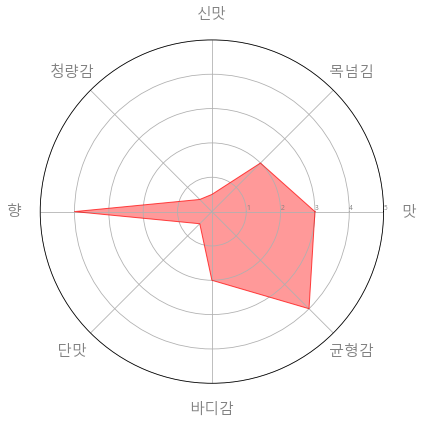

In [637]:
from math import pi
def plot_radar_chart(df, group_id):
    # 변수 수
    cls_df_sel = df.drop(group_id, axis=1).copy()
    categories=list(cls_df_sel)
    N = len(categories)

    # value 계산
    cls_df_sel = cls_df_sel[cls_df_sel.columns.tolist() + [cls_df_sel.columns.tolist()[0]]].copy()
    values = cls_df_sel.values

    # 변수의 수에 따른 angle 계산
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # 그래프 창
    plt.figure(figsize=(6,6))
    ax = plt.subplot(polar=True)

    # x축 라벨링
    plt.xticks(angles[:-1], categories, color='grey', size=15)

    #y축 라벨링
    ax.tick_params(axis='x', which='major', pad=15)
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5], ["1","2","3","4","5"], color="grey", size=7)
    plt.ylim(0,5)

    # 데이터 plotting
    color_ = ['b','r','g']

    ax.plot(angles, values[0], linewidth=1, linestyle='solid',color= color_[1], label='cluster_'+str(1+1), alpha=0.7)
    ax.fill(angles, values[0], color_[1], alpha=0.4)
#     plt.legend(loc='lower center', fontsize=13)
    plt.tight_layout()
    plt.show()
    
plot_radar_chart(output_graph, "상품명")

# 결과

In [727]:
def recommend_result(name):
    ind_num = df[df.iloc[:,0] == name].index[0]

    coco = cosine_df[ind_num].argsort()[::-1][:4]
    output_df = df.loc[coco]

    output_df_t = output_df.T

    output_graph = output_df[['상품명','맛','목넘김','신맛','청량감','향','단맛','바디감','균형감']]
    
    print('상품명 : ', output_df_t.iloc[0,0])
    print('주종 : ', output_df_t.iloc[1,0])
    print('도수 : ', output_df_t.iloc[2,0])
    print('용량 : ', output_df_t.iloc[3,0])
    print('가격 : ', output_df_t.iloc[4,0])
    
    plot_radar_chart(output_graph, "상품명")
    
    
    return  output_df_t.iloc[:5,1:5]

상품명 :  추사백25
주종 :  일반증류주
도수 :  25.0
용량 :  350 ml
가격 :  12000원


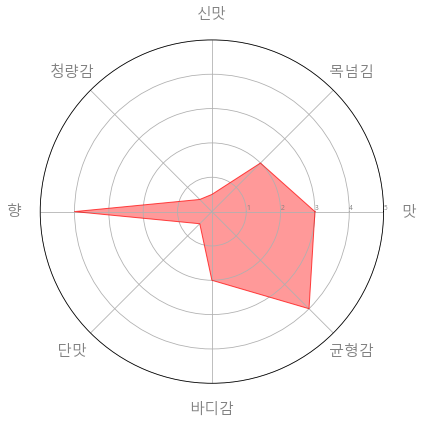

,358,183,323
상품명,이도 32,배도가 로아 19 레드,예천주복 만월40
주종,일반증류주,일반증류주,일반증류주
도수,32.0,19.0,40.0
용량,750 ml,350 ml,350 ml
가격,37000원,10000원,19200원


In [728]:
name_a = '추사백25'
recommend_result(name_a)

# Text 추가해서 추천시스템 결과 나타내기

In [163]:
df_plus = pd.read_csv('./술_정보_contents_data.csv', index_col=0)

In [164]:
df_plus

,상품명,주종,도수,용량,원재료,가격수정,ml당_가격,맛,바디감,향,목넘김,신맛,청량감,단맛,균형감,contents
0,1000억 막걸리 프리바이오,탁주,5.0,750,쌀,3500,4.67,NaN,3.0,NaN,NaN,4.0,3.0,3.0,NaN,전통주의 명가 주국순당에서 생산하는 억 막걸리 프리바이오는 내 몸속의 좋은 유산균을...
1,1000억 유산균막걸리,탁주,5.0,750,쌀,3200,4.27,NaN,3.0,NaN,NaN,5.0,5.0,3.0,NaN,전통주의 명가 주국순당에서 생산하는 억 유산균 막걸리는 김치 유산균인 식물성 유산균...
2,1932 새싹땅콩 햅쌀막걸리,살균탁주,6.0,900,쌀,15000,16.67,NaN,NaN,NaN,NaN,2.0,3.0,2.0,NaN,당년도 쌀과 새싹땅콩농축액을 주원료로 생쌀 발법으로 제조한 프리미엄 막걸리이다 전통...
3,1932 새싹땅콩 흑미막걸리,살균탁주,6.0,900,쌀,15000,16.67,NaN,NaN,NaN,NaN,1.0,1.0,3.0,NaN,당년도 진도 미쌀과 새싹땅콩 농축액을 주원료로 생쌀 발법으로 제조한 프리미엄 막걸리...
4,33JU,일반증류주,18.0,500,"산양산삼,주정,결정과당,효소처리스테비아,에리스리톨,호박산,꿀",49000,98.00,3.0,1.0,4.0,1.0,NaN,NaN,NaN,NaN,강원도 깊은 산의 정기를 가득 품은 년근 이상의 산양산삼을 고온과 저온 추출하여 숙...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,회곡 생 동동주,탁주,7.0,1200,"쌀,입국,누룩,아스파탐,효모,정제수,아세설팜칼륨",1300,1.08,NaN,NaN,NaN,NaN,2.0,3.0,3.0,NaN,대째 가업을 이어가며 순 쌀에 낙동강 청정상류 맑은 물로 정성을 더하여술을 빚는곡양...
504,회곡 생 막걸리,탁주,6.0,750,"쌀,입국,누룩,아스파탐,효모,정제수,아세설팜칼륨",1300,1.73,NaN,NaN,NaN,NaN,2.0,2.0,2.0,NaN,대째 가업을 이어가며 순 쌀에 낙동강 청정상류 맑은 물로 정성을 더하여 술을 빚는곡...
505,흑돈주,기타주류,16.0,365,황칠나무,12000,32.88,NaN,2.0,2.0,3.0,NaN,NaN,NaN,NaN,돈주는 제주 바다의 풍을 맞고 자란 칠나무를 재료로 대째 내려오는 전통제조방식으로 ...
506,희양산막걸리 15%,탁주,15.0,500,쌀,9500,19.00,NaN,5.0,NaN,NaN,4.0,1.0,3.0,NaN,양산막걸리는 경북 문경시 가은읍에 위치한 양산 자락 아래 맑은 지역에서 무농약 무학...


In [165]:
df_plus.fillna(0.5, inplace=True)

In [166]:
df_plus.rename(columns={'가격수정':'가격'}, inplace=True)

In [168]:
df_plus['가격'] = df_plus['가격'].apply(lambda x: str(x)+'원')
df_plus['용량'] = df_plus['용량'].apply(lambda x: str(x)+' ml')

In [169]:
df_plus = df_plus[['상품명','주종','도수','용량','가격','원재료','ml당_가격','맛','바디감','향','목넘김','신맛','청량감',
              '단맛','균형감','contents']]

In [170]:
df_plus

,상품명,주종,도수,용량,가격,원재료,ml당_가격,맛,바디감,향,목넘김,신맛,청량감,단맛,균형감,contents
0,1000억 막걸리 프리바이오,탁주,5.0,750 ml,3500원,쌀,4.67,0.5,3.0,0.5,0.5,4.0,3.0,3.0,0.5,전통주의 명가 주국순당에서 생산하는 억 막걸리 프리바이오는 내 몸속의 좋은 유산균을...
1,1000억 유산균막걸리,탁주,5.0,750 ml,3200원,쌀,4.27,0.5,3.0,0.5,0.5,5.0,5.0,3.0,0.5,전통주의 명가 주국순당에서 생산하는 억 유산균 막걸리는 김치 유산균인 식물성 유산균...
2,1932 새싹땅콩 햅쌀막걸리,살균탁주,6.0,900 ml,15000원,쌀,16.67,0.5,0.5,0.5,0.5,2.0,3.0,2.0,0.5,당년도 쌀과 새싹땅콩농축액을 주원료로 생쌀 발법으로 제조한 프리미엄 막걸리이다 전통...
3,1932 새싹땅콩 흑미막걸리,살균탁주,6.0,900 ml,15000원,쌀,16.67,0.5,0.5,0.5,0.5,1.0,1.0,3.0,0.5,당년도 진도 미쌀과 새싹땅콩 농축액을 주원료로 생쌀 발법으로 제조한 프리미엄 막걸리...
4,33JU,일반증류주,18.0,500 ml,49000원,"산양산삼,주정,결정과당,효소처리스테비아,에리스리톨,호박산,꿀",98.00,3.0,1.0,4.0,1.0,0.5,0.5,0.5,0.5,강원도 깊은 산의 정기를 가득 품은 년근 이상의 산양산삼을 고온과 저온 추출하여 숙...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,회곡 생 동동주,탁주,7.0,1200 ml,1300원,"쌀,입국,누룩,아스파탐,효모,정제수,아세설팜칼륨",1.08,0.5,0.5,0.5,0.5,2.0,3.0,3.0,0.5,대째 가업을 이어가며 순 쌀에 낙동강 청정상류 맑은 물로 정성을 더하여술을 빚는곡양...
504,회곡 생 막걸리,탁주,6.0,750 ml,1300원,"쌀,입국,누룩,아스파탐,효모,정제수,아세설팜칼륨",1.73,0.5,0.5,0.5,0.5,2.0,2.0,2.0,0.5,대째 가업을 이어가며 순 쌀에 낙동강 청정상류 맑은 물로 정성을 더하여 술을 빚는곡...
505,흑돈주,기타주류,16.0,365 ml,12000원,황칠나무,32.88,0.5,2.0,2.0,3.0,0.5,0.5,0.5,0.5,돈주는 제주 바다의 풍을 맞고 자란 칠나무를 재료로 대째 내려오는 전통제조방식으로 ...
506,희양산막걸리 15%,탁주,15.0,500 ml,9500원,쌀,19.00,0.5,5.0,0.5,0.5,4.0,1.0,3.0,0.5,양산막걸리는 경북 문경시 가은읍에 위치한 양산 자락 아래 맑은 지역에서 무농약 무학...


In [136]:
vect = CountVectorizer(min_df = 0, ngram_range=(1,2))
ya_df = vect.fit_transform(df_plus['원재료'])

In [138]:
arr_source = ya_df.toarray()

In [139]:
df_source = pd.DataFrame(arr_source, columns = vect.vocabulary_.keys())

In [143]:
kind_df = pd.get_dummies(df_plus[['주종']])
kind_df

,주종_과실주,주종_기타주류,주종_리큐르,주종_살균약주,주종_살균탁주,주종_약주,주종_일반증류주,주종_증류식소주,주종_청주,주종_탁주
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
503,0,0,0,0,0,0,0,0,0,1
504,0,0,0,0,0,0,0,0,0,1
505,0,1,0,0,0,0,0,0,0,0
506,0,0,0,0,0,0,0,0,0,1


In [144]:
kinds = list(kind_df.columns)

In [145]:
kinds_li = []
for k in kinds:
    kinds_li.append(k.split('_')[1])
kind_df.columns = kinds_li

In [148]:
df_del = df_plus.drop(['상품명','주종','원재료','용량','contents'], axis=1)

In [149]:
concat_df = pd.concat([df_del,kind_df ,df_source], axis=1)
concat_df

,도수,가격수정,ml당_가격,맛,바디감,향,목넘김,신맛,청량감,단맛,...,정백당,홍삼추출액 효모,효모 정백당,정백당 정제수,국내산쌀 홍삼농축액,홍삼농축액 정제수,황칠나무잎,아스파탐 효모,정제수 아세설팜칼륨,황칠나무
0,5.0,3500,4.67,0.5,3.0,0.5,0.5,4.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3200,4.27,0.5,3.0,0.5,0.5,5.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,15000,16.67,0.5,0.5,0.5,0.5,2.0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,6.0,15000,16.67,0.5,0.5,0.5,0.5,1.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,18.0,49000,98.00,3.0,1.0,4.0,1.0,0.5,0.5,0.5,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,7.0,1300,1.08,0.5,0.5,0.5,0.5,2.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
504,6.0,1300,1.73,0.5,0.5,0.5,0.5,2.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
505,16.0,12000,32.88,0.5,2.0,2.0,3.0,0.5,0.5,0.5,...,0,0,0,0,0,0,0,0,0,0
506,15.0,9500,19.00,0.5,5.0,0.5,0.5,4.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
bal_df = pd.read_csv('./술특징_contvect.csv', index_col=0)

In [153]:
concat_df = pd.concat([concat_df ,bal_df], axis=1)
concat_df

,도수,가격수정,ml당_가격,맛,바디감,향,목넘김,신맛,청량감,단맛,...,합성,합성어,합의,합주,항간,항균,항산,항상성,항아리,항암
0,5.0,3500,4.67,0.5,3.0,0.5,0.5,4.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3200,4.27,0.5,3.0,0.5,0.5,5.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,15000,16.67,0.5,0.5,0.5,0.5,2.0,3.0,2.0,...,1,0,0,0,0,0,0,0,0,0
3,6.0,15000,16.67,0.5,0.5,0.5,0.5,1.0,1.0,3.0,...,1,0,0,0,0,0,0,0,0,0
4,18.0,49000,98.00,3.0,1.0,4.0,1.0,0.5,0.5,0.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,7.0,1300,1.08,0.5,0.5,0.5,0.5,2.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
504,6.0,1300,1.73,0.5,0.5,0.5,0.5,2.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
505,16.0,12000,32.88,0.5,2.0,2.0,3.0,0.5,0.5,0.5,...,0,0,0,0,0,0,0,0,2,1
506,15.0,9500,19.00,0.5,5.0,0.5,0.5,4.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
cosine_df = cosine_similarity(concat_df, concat_df)

In [155]:
cosine_df

array([[1.        , 0.99999432, 0.99997363, ..., 0.99997022, 0.99997379,
        0.99997406],
       [0.99999432, 1.        , 0.99996596, ..., 0.99996225, 0.99996693,
        0.9999673 ],
       [0.99997363, 0.99996596, 1.        , ..., 0.99999611, 0.99999621,
        0.99999631],
       ...,
       [0.99997022, 0.99996225, 0.99999611, ..., 1.        , 0.99999574,
        0.99999407],
       [0.99997379, 0.99996693, 0.99999621, ..., 0.99999574, 1.        ,
        0.99999943],
       [0.99997406, 0.9999673 , 0.99999631, ..., 0.99999407, 0.99999943,
        1.        ]])

In [167]:
from math import pi
def plot_radar_chart(df, group_id):
    # 변수 수
    cls_df_sel = df.drop(group_id, axis=1).copy()
    categories=list(cls_df_sel)
    N = len(categories)

    # value 계산
    cls_df_sel = cls_df_sel[cls_df_sel.columns.tolist() + [cls_df_sel.columns.tolist()[0]]].copy()
    values = cls_df_sel.values

    # 변수의 수에 따른 angle 계산
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # 그래프 창
    plt.figure(figsize=(6,6))
    ax = plt.subplot(polar=True)

    # x축 라벨링
    plt.xticks(angles[:-1], categories, color='grey', size=15)

    #y축 라벨링
    ax.tick_params(axis='x', which='major', pad=15)
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5], ["1","2","3","4","5"], color="grey", size=7)
    plt.ylim(0,5)

    # 데이터 plotting
    color_ = ['b','r','g']

    ax.plot(angles, values[0], linewidth=1, linestyle='solid',color= color_[1], label='cluster_'+str(1+1), alpha=0.7)
    ax.fill(angles, values[0], color_[1], alpha=0.4)
#     plt.legend(loc='lower center', fontsize=13)
    plt.tight_layout()
    plt.show()
    
# plot_radar_chart(output_graph, "상품명")

In [194]:
def recommend_result(name):
    ind_num = df_plus[df_plus.iloc[:,0] == name].index[0]

    coco = cosine_df[ind_num].argsort()[::-1][:4]
    output_df = df_plus.loc[coco]

    output_df_t = output_df.T

    output_graph = output_df[['상품명','맛','목넘김','신맛','청량감','향','단맛','바디감','균형감']]
    
    print('상품명 : ', output_df_t.iloc[0,0])
    print('주종 : ', output_df_t.iloc[1,0])
    print('도수 : ', output_df_t.iloc[2,0])
    print('용량 : ', output_df_t.iloc[3,0])
    print('가격 : ', output_df_t.iloc[4,0])
    print('해시태그 : ', output_df_t.iloc[5,0])
    
    plot_radar_chart(output_graph, "상품명")
    
    
    return  output_df_t.iloc[:6,1:6]

상품명 :  선운산 복분자주 프리미엄
주종 :  과실주
도수 :  19.0
용량 :  700 ml
가격 :  40000원
해시태그 :  '#복분자주', '#선운산', '#프리미엄', '#고창', '#숙성'


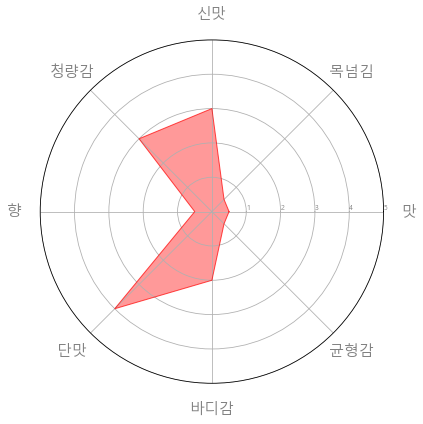

,422,21,274
상품명,추성주,감홍로 청자,신례명주
주종,일반증류주,일반증류주,일반증류주
도수,25.0,40.0,50.0
용량,700 ml,700 ml,750 ml
가격,80000원,90000원,99000원
keyword,'#추성주','#감로',"'#제주', '#감귤', '#시트러스', '#제품', '#신례'"


In [200]:
name_a = '선운산 복분자주 프리미엄'
recommend_result(name_a)

# 해시태그 추가하기

In [173]:
keyowrd_df = pd.read_csv('./키워드_추출.csv', index_col=0)

In [175]:
keyowrd_df.drop('상품명', axis=1, inplace=True)

In [183]:
keyowrd_df['keyword'] = keyowrd_df['keyword'].apply(lambda x:str(x).replace('[','').replace(']',''))

In [184]:
keyowrd_df

,keyword
0,"'#막걸리', '#전통주', '#유산균', '#국순당', '#양조장', '#프리바이..."
1,"'#전통주', '#국순당', '#유산균', '#양조장', '#막걸리', '#우리술'"
2,'#막걸리'
3,"'#막걸리', '#제품'"
4,nan
...,...
503,'#위생'
504,'#위생'
505,"'#술이', '#칠나무', '#돈주'"
506,"'#양산', '#막걸리'"


In [186]:
df_plus = pd.concat([df_plus,keyowrd_df], axis=1)

In [188]:
df_plus = df_plus[['상품명','주종','도수','용량','가격','keyword','원재료','ml당_가격','맛','바디감','향','목넘김','신맛','청량감',
              '단맛','균형감','contents']]

In [187]:
df_plus

,상품명,주종,도수,용량,가격,원재료,ml당_가격,맛,바디감,향,목넘김,신맛,청량감,단맛,균형감,contents,keyword
0,1000억 막걸리 프리바이오,탁주,5.0,750 ml,3500원,쌀,4.67,0.5,3.0,0.5,0.5,4.0,3.0,3.0,0.5,전통주의 명가 주국순당에서 생산하는 억 막걸리 프리바이오는 내 몸속의 좋은 유산균을...,"'#막걸리', '#전통주', '#유산균', '#국순당', '#양조장', '#프리바이..."
1,1000억 유산균막걸리,탁주,5.0,750 ml,3200원,쌀,4.27,0.5,3.0,0.5,0.5,5.0,5.0,3.0,0.5,전통주의 명가 주국순당에서 생산하는 억 유산균 막걸리는 김치 유산균인 식물성 유산균...,"'#전통주', '#국순당', '#유산균', '#양조장', '#막걸리', '#우리술'"
2,1932 새싹땅콩 햅쌀막걸리,살균탁주,6.0,900 ml,15000원,쌀,16.67,0.5,0.5,0.5,0.5,2.0,3.0,2.0,0.5,당년도 쌀과 새싹땅콩농축액을 주원료로 생쌀 발법으로 제조한 프리미엄 막걸리이다 전통...,'#막걸리'
3,1932 새싹땅콩 흑미막걸리,살균탁주,6.0,900 ml,15000원,쌀,16.67,0.5,0.5,0.5,0.5,1.0,1.0,3.0,0.5,당년도 진도 미쌀과 새싹땅콩 농축액을 주원료로 생쌀 발법으로 제조한 프리미엄 막걸리...,"'#막걸리', '#제품'"
4,33JU,일반증류주,18.0,500 ml,49000원,"산양산삼,주정,결정과당,효소처리스테비아,에리스리톨,호박산,꿀",98.00,3.0,1.0,4.0,1.0,0.5,0.5,0.5,0.5,강원도 깊은 산의 정기를 가득 품은 년근 이상의 산양산삼을 고온과 저온 추출하여 숙...,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,회곡 생 동동주,탁주,7.0,1200 ml,1300원,"쌀,입국,누룩,아스파탐,효모,정제수,아세설팜칼륨",1.08,0.5,0.5,0.5,0.5,2.0,3.0,3.0,0.5,대째 가업을 이어가며 순 쌀에 낙동강 청정상류 맑은 물로 정성을 더하여술을 빚는곡양...,'#위생'
504,회곡 생 막걸리,탁주,6.0,750 ml,1300원,"쌀,입국,누룩,아스파탐,효모,정제수,아세설팜칼륨",1.73,0.5,0.5,0.5,0.5,2.0,2.0,2.0,0.5,대째 가업을 이어가며 순 쌀에 낙동강 청정상류 맑은 물로 정성을 더하여 술을 빚는곡...,'#위생'
505,흑돈주,기타주류,16.0,365 ml,12000원,황칠나무,32.88,0.5,2.0,2.0,3.0,0.5,0.5,0.5,0.5,돈주는 제주 바다의 풍을 맞고 자란 칠나무를 재료로 대째 내려오는 전통제조방식으로 ...,"'#술이', '#칠나무', '#돈주'"
506,희양산막걸리 15%,탁주,15.0,500 ml,9500원,쌀,19.00,0.5,5.0,0.5,0.5,4.0,1.0,3.0,0.5,양산막걸리는 경북 문경시 가은읍에 위치한 양산 자락 아래 맑은 지역에서 무농약 무학...,"'#양산', '#막걸리'"
